[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)] (https://colab.research.google.com/github/miguelcc705/Proyecto_Inteligencia_Artifical/blob/main/PROYECTO_IA_Miguel.ipynb)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"miguelcc007","key":"5bb3315cb43c4db430d791e9bc430112"}'}

In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d vbookshelf/respiratory-sound-database

100% 3.68G/3.69G [00:29<00:00, 101MB/s] 
100% 3.69G/3.69G [00:29<00:00, 132MB/s]


In [ ]:
!unzip /content/respiratory-sound-database.zip

Archive:  /content/respiratory-sound-database.zip
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.wav  
  inflating: Respirato

In [ ]:
import librosa
import pywt
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import scipy.signal as signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
demografia=list();

In [ ]:
#Extraccion de la informacion de demografica de los pacientes del estudio segun archivo txt
with open('/content/demographic_info.txt') as file:
    for line in file:
        demografia.append(line.rstrip())

In [ ]:
demografia.remove('223 NA NA NA NA NA');

In [ ]:
print(demografia)

['', '101 3 F NA 19 99', '102 0.75 F NA 9.8 73', '103 70 F 33 NA NA', '104 70 F 28.47 NA NA', '105 7 F NA 32 135', '106 73 F 21 NA NA', '107 75 F 33.7 NA NA', '108 3 M NA NA NA', '109 84 F 33.53 NA NA', '110 75 M 25.21 NA NA', '111 63 M 28.4 NA NA', '112 60 M 22.86 NA NA', '113 58 M 28.41 NA NA', '114 77 M 23.12 NA NA', '115 0.58 M NA 7.14 64', '116 56 M 28.58 NA NA', '117 68 M 24.4 NA NA', '118 81 M 36.76 NA NA', '119 2 F NA 15.2 94', '120 78 M 35.14 NA NA', '121 13 F NA 65 170', '122 66 M 33 NA NA', '123 5 M NA 25 125', '124 65 M 29.07 NA NA', '125 14 M NA 62 170', '126 1 F NA 10.18 80', '127 2 M NA 12.6 98', '128 65 F 24.3 NA NA', '129 6 M NA 23 119', '130 85 F 17.1 NA NA', '131 3 M NA 14 97', '132 71 M 34 NA NA', '133 68 M 27.4 NA NA', '134 61 M 32 NA NA', '135 70 M 21 NA NA', '136 5 M NA 16.2 110', '137 4 M NA 18 104', '138 56 F 21.6 NA NA', '139 61 M 28.68 NA NA', '140 79 F 23 NA NA', '141 66 M 22.4 NA NA', '142 78 M 26.1 NA NA', '143 0.25 F NA 8.24 68', '144 3 M NA 16.7 100', '1

In [ ]:
##Archivos de audio y texto con los datos descargados desde Kaggle
import os
respiratorysounds = os.listdir('/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files')
print('Cantidad de archivos',len(respiratorysounds))
print('Nombres de los archivos:',respiratorysounds)

Cantidad de archivos 1840
Nombres de los archivos: ['135_2b3_Ar_mc_LittC2SE.txt', '174_1p4_Tc_mc_AKGC417L.txt', '211_2p2_Tc_mc_AKGC417L.txt', '203_1p2_Tc_mc_AKGC417L.txt', '147_2b3_Al_mc_AKGC417L.wav', '118_1b1_Al_sc_Litt3200.txt', '207_2b4_Pr_mc_AKGC417L.wav', '110_1p1_Pr_sc_Meditron.txt', '146_8p3_Ar_mc_AKGC417L.txt', '213_2p2_Ar_mc_AKGC417L.txt', '139_1b1_Ar_sc_Litt3200.wav', '170_2b2_Pl_mc_AKGC417L.txt', '133_3p2_Al_mc_AKGC417L.wav', '197_1b1_Tc_sc_Meditron.txt', '197_1b1_Al_sc_Meditron.txt', '205_4b2_Al_mc_AKGC417L.txt', '170_2b2_Pr_mc_AKGC417L.txt', '154_4b4_Ll_mc_AKGC417L.wav', '207_2b4_Tc_mc_AKGC417L.wav', '133_2p2_Al_mc_AKGC417L.wav', '225_1b1_Pl_sc_Meditron.wav', '211_1p3_Ar_mc_AKGC417L.wav', '138_1p3_Ll_mc_AKGC417L.wav', '166_1p1_Ar_sc_Meditron.txt', '163_2b2_Pl_mc_AKGC417L.wav', '188_1b1_Ar_sc_Meditron.wav', '221_2b3_Pr_mc_LittC2SE.txt', '151_2p4_Al_mc_AKGC417L.txt', '112_1b1_Lr_sc_Meditron.txt', '130_3p4_Pr_mc_AKGC417L.wav', '154_1b3_Ll_mc_AKGC417L.txt', '156_5b3_Pr_mc_AKG

In [ ]:
#Almacenamiento de la informacion 
#Audiostxt y audioswav se usan para hacer el split
audiostxt=list();
audioswav=list();
#Archivos_audio y Archivos_texto almacenan la ruta del archivo.wav y la ruta del archivo.txt respectivamente
archivos_audio=list()
archivos_texto=list()
for i in range(0,len(respiratorysounds)):
  if respiratorysounds[i].split('.')[1] == ('txt'): #Si el archivo es de texto lo almacena en archivos_texto
    audiostxt.append(respiratorysounds[i].split('.'));
    archivos_texto.append(respiratorysounds[i]);
  elif respiratorysounds[i].split('.')[1] == ('wav'):#Si el archivo es de audio lo almacena en archivos_texto
    audioswav.append(respiratorysounds[i].split('.'));
    archivos_audio.append(respiratorysounds[i]);

In [ ]:
print(len(archivos_texto));
print(len(archivos_audio));

920
920


In [ ]:
archivos_texto_new=list()
archivos_audio_new=list()
for i in range(0,len(archivos_texto)):

  rut=archivos_texto[i].split('_');
  if (int(rut[0])!=223):
    archivos_texto_new.append(archivos_texto[i])

for i in range(0,len(archivos_audio)):
  rut=archivos_audio[i].split('_');
  if (int(rut[0])!=223):
    archivos_audio_new.append(archivos_audio[i])

In [ ]:
print(len(archivos_texto_new));
print(len(archivos_audio_new));

914
914


#Fuenciones para el procesameinto de una señal.

In [ ]:
def wnoisest(coeff): #Ponderacion
    stdc = np.zeros((len(coeff),1));

    for i in range(0,len(coeff)):
        stdc[i] = (np.median(np.absolute(coeff[i])))/0.6745;
    return stdc;

def threshold(coeff): #Umbral
    Num_samples = 0;
    for i in range(0,len(coeff)):
        Num_samples = Num_samples + coeff[i].shape[0];
    
    thr = np.sqrt(2*(np.log(Num_samples)))
    return thr

def wthresh(coeff): # denoising
    y   = list();
    s = wnoisest(coeff);
    thr = threshold(coeff)
    for i in range(0,len(coeff)):
        y.append(np.multiply(coeff[i],np.abs(coeff[i])>(thr*s[i])));
    return thr,s,y;

In [ ]:
#-------------------------------------------------------------------------------------------------
#FILTRADO EN AMPLITUD
def wavelet_denoising(audio): #Eliminacion del ruido
  LL = int(np.floor(np.log2(audio.shape[0]))); #Nivel de descomposicion

  data_wavelet = pywt.wavedec(audio, 'db6', level=LL );#Coeficientes de aproximacion y detalle
  details = data_wavelet[1:]; #Coeficientes de detalle
  thr, s, details_t = wthresh(details); #Umbralizacion
  coeff = list();
  coeff.append(data_wavelet[0]);#Coeficiente de aproximacion

  for i in range(len(details_t)):#Adicion de cada uno de los coeficientes de detalle
    coeff.append(details_t[i]) 
  x_rec = pywt.waverec( coeff, 'db6');#Reconstruccion de la señal con los detalle de ruido
  x_rec = x_rec[0:audio.shape[0]]; 
  x_filt = np.squeeze(audio - x_rec);#Eliminacion del ruido en la señal
  return x_filt #Retorno de la señal filtrada en amplitud
#--------------------------------------------------------------------------------------------------
#FILTRADO EN FRECUENCIA. 1000 100
def filtrado(audio,sr):
  fs = sr;
  orden=31;
  Fc_h=1000
  Fc_l=100
  wn_pb=2*Fc_h/fs;
  wn_pa=2*Fc_l/fs;
  #design
  lowpass=signal.firwin(orden,wn_pb,pass_zero='lowpass'); #Pasa bajas entre 0-1000
  highpass=signal.firwin(orden,wn_pa,pass_zero='highpass');#Pasa altas 0-100

  y_hp = signal.filtfilt(highpass, 1, audio); #Filtro pasaaltas
  y_bp = signal.filtfilt(lowpass, 1, y_hp);   #Filtro pasabandas
  y_bp = np.asfortranarray(y_bp)         
  return y_bp

#---------------------------------------------------------------------------------------------------
def preprocesamiento(senal,sr):
  y_bp=filtrado(senal,sr);
  senal_prepros=wavelet_denoising(y_bp);
  return senal_prepros  #Retorna la señal filtrada

#---------------------------------------------------------------------------------------------------
#DENSIDAD ESPECTRAL DE POTENCIA.

def dep_ciclo(ciclorespiratorio):
  nperseg = 2000; #Tamaño de la ventana del metodo de welch
  noverlap = int(nperseg/2); #Solapamiento de la ventana,correspondiente al 50%   
  fs=22050;
  f, Pxx = signal.welch(ciclorespiratorio, fs, 'hamming', nperseg, noverlap,scaling='density');
  DEP=(Pxx[(f>=80) & (f<=250)]); #Se añaden a lista de la densidad espectral de potencia
  ft=(f[(f>=80) & (f<=250)]); #Se añade la frecuencia al vector de frecuencias
  IndiceDEP=np.sum(DEP) #Indice para analisis de la DEP como area en el rango de las frecuencias de interes

  return IndiceDEP

#FUENCIÓN PARA EXTRAER Y FILTRAR CICLOS.

In [ ]:
#Ingresado un archivo de texto extrae los ciclos y sus caracteristicas 
#Si filtro==True filtra la señal mediante la funcion anterior
def extraccionciclos(ruta_texto,demografia):
  ruta=ruta_texto.split('.')[0];
  ruta_audio=ruta+('.wav');

  num_paciente=ruta_texto.split('/')[5].split('_')[0];
  pos_estetoscopio=ruta_texto.split('/')[5].split('_')[2];
  anotacionestxt=list();
  anotacioneswav=list();
  extraccion=list();
  fs=22050;
  
  for i in range(0,len(demografia)):
    num_paciente2=demografia[i].split(' ')[0];
    if (num_paciente)==(num_paciente2):
      edad=demografia[i].split(' ')[1];
      sexo=demografia[i].split(' ')[2];

  with open(ruta_texto) as file:
    for line in file:
        anotacionestxt.append(line.rstrip());
  audio=(librosa.load(ruta_audio))[0];
  audio=preprocesamiento(audio,fs);

  nciclos=len(anotacionestxt);
  for i in range(0,nciclos):
    ciclos=list();
    c=anotacionestxt[i].split('\t');    
    ciclos.append(edad); #edad
    ciclos.append(sexo); #sexo
    ciclos.append(pos_estetoscopio);
    if (int(c[2]==1)) or (int(c[3])==1):
      ciclos.append(1); #enfermo
    else: ciclos.append(0); #sano
    ciclos.append(dep_ciclo(audio[int(float(c[0])*fs):int(float(c[1])*fs)]));#Audio del ciclo
    extraccion.append(ciclos);
  #Retorna una lista donde cada elemento corresponde a la informacion de un ciclo 
  #almacenado en una   lista que contiene:
  #EDAD,SEXO,POSICIÓN,ENFERMO(1)/SANO(0),CICLO
  return np.asarray(extraccion) 

In [ ]:
au="/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt"
j=au.split("/")
print(j[5])

101_1b1_Pr_sc_Meditron.txt


In [ ]:
##Concatenacion con datos desde Kaggle
inf_dataset=np.array([[np.nan,np.nan,np.nan,np.nan,np.nan]])
for i in range(0,len(archivos_texto_new)):
  new_information=extraccionciclos("/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"+archivos_texto_new[i],demografia);
  inf_dataset=np.concatenate((inf_dataset,new_information),axis=0);

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [ ]:
edades=inf_dataset[:,0];
sexos=inf_dataset[:,1];
posiciones=inf_dataset[:,2];
diagnostico=inf_dataset[:,3];
audiociclo=inf_dataset[:,4];

In [ ]:
DF=pd.DataFrame(columns=['EDAD', 'SEXO', 'POS','DIAGNOSTICO','AUDIO']);
DF.EDAD=edades;
DF.SEXO=sexos;
DF.POS=posiciones;
DF.DIAGNOSTICO=diagnostico;
DF.AUDIO=audiociclo;

In [ ]:
print(DF)

      EDAD SEXO  POS DIAGNOSTICO                   AUDIO
0      nan  nan  nan         nan                     nan
1       70    M   Ar           0   4.675336536948904e-06
2       70    M   Ar           0   5.009240280823688e-06
3       70    M   Ar           0   4.541521555924672e-06
4       70    M   Ar           0   4.161725056248757e-06
...    ...  ...  ...         ...                     ...
6833  0.25    F   Al           0  1.5445415570218107e-07
6834  0.25    F   Al           0   2.431293192383355e-07
6835  0.25    F   Al           0  1.4551901625606682e-07
6836  0.25    F   Al           0  1.6642686817949765e-07
6837  0.25    F   Al           0   1.925013727662217e-07

[6838 rows x 5 columns]


In [ ]:
DFCOPY=DF.copy();

DFCOPY.insert(2,"Pos_Tc",np.nan, allow_duplicates=False); #Creamos una columna para cada posición independiente
DFCOPY.insert(3,"Pos_Al",np.nan, allow_duplicates=False);
DFCOPY.insert(4,"Pos_Ar",np.nan, allow_duplicates=False);
DFCOPY.insert(5,"Pos_Pl",np.nan, allow_duplicates=False);
DFCOPY.insert(6,"Pos_Pr",np.nan, allow_duplicates=False);
DFCOPY.insert(7,"Pos_Ll",np.nan, allow_duplicates=False);
DFCOPY.insert(8,"Pos_Lr",np.nan, allow_duplicates=False);

DFCOPY.Pos_Tc[DFCOPY.POS=="Tc"]=1; DFCOPY.Pos_Tc=DFCOPY.Pos_Tc.fillna(0); DFCOPY.Pos_Tc=DFCOPY.Pos_Tc.astype(int); #Cada valor indica si el ciclo fue tomado en dicha posición (1) o no (0)
DFCOPY.Pos_Al[DFCOPY.POS=="Al"]=1; DFCOPY.Pos_Al=DFCOPY.Pos_Al.fillna(0); DFCOPY.Pos_Al=DFCOPY.Pos_Al.astype(int);
DFCOPY.Pos_Ar[DFCOPY.POS=="Ar"]=1; DFCOPY.Pos_Ar=DFCOPY.Pos_Ar.fillna(0); DFCOPY.Pos_Ar=DFCOPY.Pos_Ar.astype(int);
DFCOPY.Pos_Pl[DFCOPY.POS=="Pl"]=1; DFCOPY.Pos_Pl=DFCOPY.Pos_Pl.fillna(0); DFCOPY.Pos_Pl=DFCOPY.Pos_Pl.astype(int);
DFCOPY.Pos_Pr[DFCOPY.POS=="Pr"]=1; DFCOPY.Pos_Pr=DFCOPY.Pos_Pr.fillna(0); DFCOPY.Pos_Pr=DFCOPY.Pos_Pr.astype(int);
DFCOPY.Pos_Ll[DFCOPY.POS=="Ll"]=1; DFCOPY.Pos_Ll=DFCOPY.Pos_Ll.fillna(0); DFCOPY.Pos_Ll=DFCOPY.Pos_Ll.astype(int);
DFCOPY.Pos_Lr[DFCOPY.POS=="Lr"]=1; DFCOPY.Pos_Lr=DFCOPY.Pos_Lr.fillna(0); DFCOPY.Pos_Lr=DFCOPY.Pos_Lr.astype(int);

DFCOPY=DFCOPY.drop('POS', axis=1);
DFCOPY=DFCOPY.drop(DFCOPY.index[0]);

DFCOPY.SEXO[DFCOPY.SEXO=="M"]=1;DFCOPY.SEXO[DFCOPY.SEXO=="F"]=0;DFCOPY.SEXO=DFCOPY.SEXO.astype(int); #cambiamos la forma de sexo a M=1 y F=0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

In [ ]:
print(DFCOPY)

      EDAD  SEXO  Pos_Tc  Pos_Al  Pos_Ar  Pos_Pl  Pos_Pr  Pos_Ll  Pos_Lr  \
1       70     1       0       0       1       0       0       0       0   
2       70     1       0       0       1       0       0       0       0   
3       70     1       0       0       1       0       0       0       0   
4       70     1       0       0       1       0       0       0       0   
5       70     1       0       0       1       0       0       0       0   
...    ...   ...     ...     ...     ...     ...     ...     ...     ...   
6833  0.25     0       0       1       0       0       0       0       0   
6834  0.25     0       0       1       0       0       0       0       0   
6835  0.25     0       0       1       0       0       0       0       0   
6836  0.25     0       0       1       0       0       0       0       0   
6837  0.25     0       0       1       0       0       0       0       0   

     DIAGNOSTICO                   AUDIO  
1              0   4.675336536948904e-06  
2

In [ ]:
DFCOPY.to_csv('Dataframe_datos_Graficas.csv', header=True, index=True)

In [ ]:
DFCOPY=pd.read_csv("Dataframe_datos_Graficas.csv");
print(DFCOPY)

      Unnamed: 0   EDAD  SEXO  Pos_Tc  Pos_Al  Pos_Ar  Pos_Pl  Pos_Pr  Pos_Ll  \
0              1  70.00     1       0       0       1       0       0       0   
1              2  70.00     1       0       0       1       0       0       0   
2              3  70.00     1       0       0       1       0       0       0   
3              4  70.00     1       0       0       1       0       0       0   
4              5  70.00     1       0       0       1       0       0       0   
...          ...    ...   ...     ...     ...     ...     ...     ...     ...   
6832        6833   0.25     0       0       1       0       0       0       0   
6833        6834   0.25     0       0       1       0       0       0       0   
6834        6835   0.25     0       0       1       0       0       0       0   
6835        6836   0.25     0       0       1       0       0       0       0   
6836        6837   0.25     0       0       1       0       0       0       0   

      Pos_Lr  DIAGNOSTICO  

In [ ]:
Data_Tc=DFCOPY[(DFCOPY["Pos_Tc"]==1)]
Data_Al=DFCOPY[(DFCOPY["Pos_Al"]==1)]
Data_Ar=DFCOPY[(DFCOPY["Pos_Ar"]==1)]
Data_Pl=DFCOPY[(DFCOPY["Pos_Pl"]==1)]
Data_Pr=DFCOPY[(DFCOPY["Pos_Pr"]==1)]
Data_Ll=DFCOPY[(DFCOPY["Pos_Ll"]==1)]
Data_Lr=DFCOPY[(DFCOPY["Pos_Lr"]==1)]
Data_M=DFCOPY[(DFCOPY["SEXO"]==1)]
Data_F=DFCOPY[(DFCOPY["SEXO"]==0)]

In [ ]:
DFCOPY.describe()

,Unnamed: 0,EDAD,SEXO,Pos_Tc,Pos_Al,Pos_Ar,Pos_Pl,Pos_Pr,Pos_Ll,Pos_Lr,DIAGNOSTICO,AUDIO
count,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.00000,6837.000000,6837.000000,6.837000e+03
mean,3419.000000,61.955494,0.655989,0.134416,0.179465,0.185315,0.150358,0.145239,0.08688,0.118327,0.201697,7.715050e-05
std,1973.816228,22.873476,0.475079,0.341123,0.383769,0.388581,0.357448,0.352368,0.28168,0.323018,0.401296,1.788596e-04
min,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.774901e-09
25%,1710.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.083383e-06
50%,3419.000000,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.211773e-05
75%,5128.000000,75.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.285089e-05
max,6837.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.231125e-03


In [ ]:
DFCOPY.head()

,Unnamed: 0,EDAD,SEXO,Pos_Tc,Pos_Al,Pos_Ar,Pos_Pl,Pos_Pr,Pos_Ll,Pos_Lr,DIAGNOSTICO,AUDIO
0,1,70.0,1,0,0,1,0,0,0,0,0,0.000005
1,2,70.0,1,0,0,1,0,0,0,0,0,0.000005
2,3,70.0,1,0,0,1,0,0,0,0,0,0.000005
3,4,70.0,1,0,0,1,0,0,0,0,0,0.000004
4,5,70.0,1,0,0,1,0,0,0,0,0,0.000005


In [ ]:
from sklearn.neural_network import MLPClassifier #Multi-layer Perceptron classifier
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from sklearn.metrics import mean_squared_error #Mean squared error regression loss.
from math import sqrt
from sklearn.metrics import r2_score # (coefficient of determination) regression score function.
from sklearn.metrics import classification_report,confusion_matrix #Build a text report showing the main classification metrics.
from sklearn.model_selection import ShuffleSplit

In [ ]:
################################### Funcion para graficar matrices de confusion #########################################
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
target_column = ['DIAGNOSTICO'] #Sano - Enfermo
predictors = list(set(list(DFCOPY.columns))-set(target_column))
print(predictors)

DFCOPY[predictors] = DFCOPY[predictors]/DFCOPY[predictors].max()
DFCOPY.describe()

['Pos_Lr', 'SEXO', 'EDAD', 'AUDIO', 'Pos_Al', 'Pos_Pl', 'Pos_Ll', 'Pos_Pr', 'Unnamed: 0', 'Pos_Ar', 'Pos_Tc']


,Unnamed: 0,EDAD,SEXO,Pos_Tc,Pos_Al,Pos_Ar,Pos_Pl,Pos_Pr,Pos_Ll,Pos_Lr,DIAGNOSTICO,AUDIO
count,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.00000,6837.000000,6837.000000,6837.000000
mean,0.500073,0.666188,0.655989,0.134416,0.179465,0.185315,0.150358,0.145239,0.08688,0.118327,0.201697,0.023877
std,0.288696,0.245951,0.475079,0.341123,0.383769,0.388581,0.357448,0.352368,0.28168,0.323018,0.401296,0.055355
min,0.000146,0.002688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000002
25%,0.250110,0.623656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000645
50%,0.500073,0.731183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.003750
75%,0.750037,0.806452,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.022547
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
X1 = DFCOPY[predictors].values
y1 = DFCOPY[target_column].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=40) #test 30% - train 70%, flag = 40
y1_test = np.squeeze(y1_test)
y1_train = np.squeeze(y1_train) 
print(X1_train.shape)
print(y1_train.shape)

print(X1_test.shape)
print(y1_test.shape)

(4785, 11)
(4785,)
(2052, 11)
(2052,)


**Iteracion 1**

In [ ]:
#Three hidden layer each layer with eigth neurons
# Hay que modificar las capas para ver como afecta
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) 
print(mlp)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)


In [ ]:
mlp.fit(X1_train,y1_train) #The base object, implements a fit method to learn from data

predict_train = mlp.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = mlp.predict(X1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#%% Results
print(confusion_matrix(y1_test,predict_test))

[[1591   31]
 [ 387   43]]


In [ ]:
target_names = ['Sanos', 'Enfermos']
print(classification_report(y1_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

       Sanos       0.80      0.98      0.88      1622
    Enfermos       0.58      0.10      0.17       430

    accuracy                           0.80      2052
   macro avg       0.69      0.54      0.53      2052
weighted avg       0.76      0.80      0.73      2052



Confusion matrix, without normalization
[[1591   31]
 [ 387   43]]


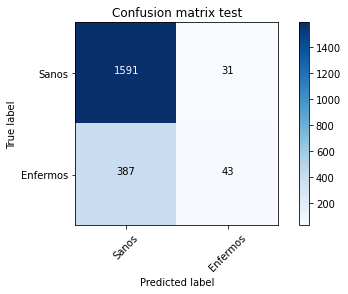

In [ ]:
matriz_1 = confusion_matrix(y1_test,predict_test)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix test')

In [ ]:
#X1_train, X1_test, y1_train, y1_test
mlp.score(X1_train,y1_train),mlp.score(X1_test, y1_test)


(0.8208986415882967, 0.7962962962962963)

In [ ]:
r2_score(y1_test,mlp.predict(X1_test))
r2_score(y1_train,mlp.predict(X1_train))

-0.12646565013828281

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
[[3793   43]
 [ 877   72]]
              precision    recall  f1-score   support

       Sanos       0.81      0.99      0.89      3836
    Enfermos       0.63      0.08      0.14       949

    accuracy                           0.81      4785
   macro avg       0.72      0.53      0.51      4785
weighted avg       0.78      0.81      0.74      4785

Confusion matrix, without normalization
[[3793   43]
 [ 877   72]]


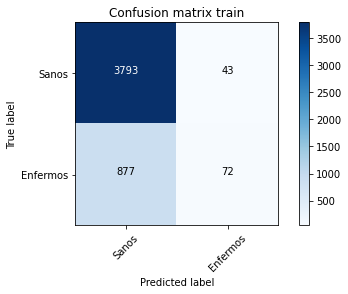

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=500) 
print(mlp)

mlp.fit(X1_train,y1_train) #The base object, implements a fit method to learn from data

predict_train = mlp.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = mlp.predict(X1_test)

#%% Results
print(confusion_matrix(y1_train,predict_train))

target_names = ['Sanos', 'Enfermos']
print(classification_report(y1_train,predict_train,target_names=target_names))

matriz_1 = confusion_matrix(y1_train,predict_train)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix train')

0.7904483430799221
0.8016718913270637


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Sanos       0.80      1.00      0.89      3836
    Enfermos       0.00      0.00      0.00       949

    accuracy                           0.80      4785
   macro avg       0.40      0.50      0.44      4785
weighted avg       0.64      0.80      0.71      4785

Confusion matrix, without normalization
[[3836    0]
 [ 949    0]]


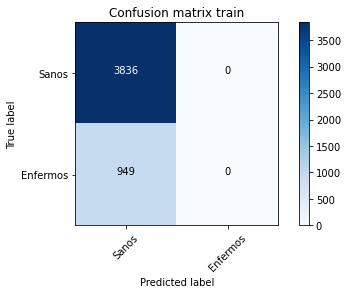

In [ ]:
from sklearn.svm import SVC

sv = SVC(gamma=1e-2)
sv.fit(X1_train,y1_train)
print (sv.score(X1_test,y1_test))
print (sv.score(X1_train,y1_train))



#plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
#print ("number of support vectors", len(sv.support_vectors_))

predict_train = sv.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = sv.predict(X1_test)

target_names = ['Sanos', 'Enfermos']
print(classification_report(y1_train,predict_train,target_names=target_names))

matriz_1 = confusion_matrix(y1_train,predict_train)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix train')

0.7904483430799221
0.8016718913270637


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Sanos       0.79      1.00      0.88      1622
    Enfermos       0.00      0.00      0.00       430

    accuracy                           0.79      2052
   macro avg       0.40      0.50      0.44      2052
weighted avg       0.62      0.79      0.70      2052

Confusion matrix, without normalization
[[1622    0]
 [ 430    0]]


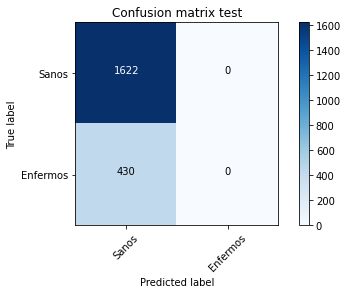

In [ ]:
## KEEPOUTPUT
from sklearn.svm import SVC

sv = SVC(gamma=.1)
sv.fit(X1_train,y1_train)
print (sv.score(X1_test,y1_test))
print (sv.score(X1_train,y1_train))



#plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
#print ("number of support vectors", len(sv.support_vectors_))

predict_train = sv.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = sv.predict(X1_test)

target_names = ['Sanos', 'Enfermos']
print(classification_report(y1_test,predict_test,target_names=target_names))

matriz_1 = confusion_matrix(y1_test,predict_test)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix test')

0.7904483430799221
0.8016718913270637


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Sanos       0.79      1.00      0.88      1622
    Enfermos       0.00      0.00      0.00       430

    accuracy                           0.79      2052
   macro avg       0.40      0.50      0.44      2052
weighted avg       0.62      0.79      0.70      2052

Confusion matrix, without normalization
[[1622    0]
 [ 430    0]]


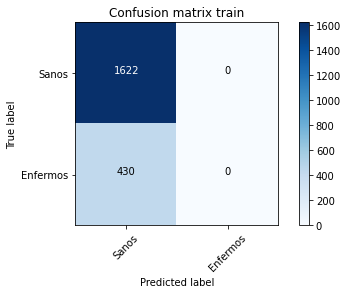

In [ ]:
## KEEPOUTPUT
sv = SVC(gamma=1)
sv.fit(X1_train,y1_train)
print (sv.score(X1_test,y1_test))
print (sv.score(X1_train,y1_train))



#plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
#print ("number of support vectors", len(sv.support_vectors_))

predict_train = sv.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = sv.predict(X1_test)

target_names = ['Sanos', 'Enfermos']
print(classification_report(y1_test,predict_test,target_names=target_names))

matriz_1 = confusion_matrix(y1_test,predict_test)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix train')

0.7904483430799221
0.8016718913270637


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Sanos       0.79      1.00      0.88      1622
    Enfermos       0.00      0.00      0.00       430

    accuracy                           0.79      2052
   macro avg       0.40      0.50      0.44      2052
weighted avg       0.62      0.79      0.70      2052

Confusion matrix, without normalization
[[1622    0]
 [ 430    0]]


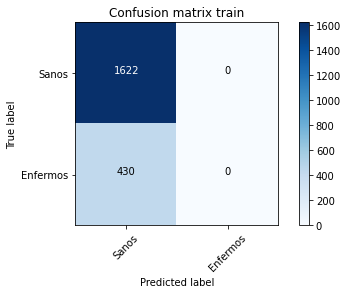

In [ ]:
## KEEPOUTPUT
sv = SVC(gamma=1e-4)
sv.fit(X1_train,y1_train)
print (sv.score(X1_test,y1_test))
print (sv.score(X1_train,y1_train))



#plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
#print ("number of support vectors", len(sv.support_vectors_))

predict_train = sv.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = sv.predict(X1_test)

target_names = ['Sanos', 'Enfermos']
print(classification_report(y1_test,predict_test,target_names=target_names))

matriz_1 = confusion_matrix(y1_test,predict_test)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix train')

0.8996101364522417
0.9993730407523511
              precision    recall  f1-score   support

       Sanos       0.93      0.95      0.94      1622
    Enfermos       0.79      0.71      0.75       430

    accuracy                           0.90      2052
   macro avg       0.86      0.83      0.84      2052
weighted avg       0.90      0.90      0.90      2052

Confusion matrix, without normalization
[[1540   82]
 [ 124  306]]


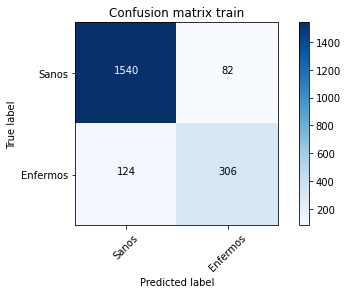

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(max_depth=20)
estimator.fit(X1_train,y1_train)
print (estimator.score(X1_test,y1_test))
print (estimator.score(X1_train,y1_train))



#plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
#print ("number of support vectors", len(sv.support_vectors_))

predict_train = estimator.predict(X1_train) #For supervised learning, or some unsupervised problems
predict_test = estimator.predict(X1_test)

target_names = ['Sanos', 'Enfermos']

print(classification_report(y1_test,predict_test,target_names=target_names))

matriz_1 = confusion_matrix(y1_test,predict_test)
plot_confusion_matrix(matriz_1, classes=target_names,
                      title='Confusion matrix train')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Tc')]

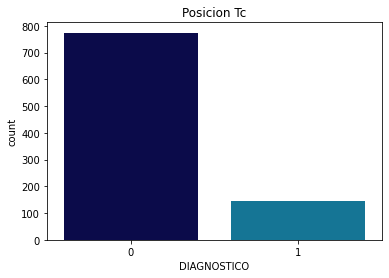

In [ ]:
import seaborn as sns
grafico_Tc=sns.countplot(Data_Tc["DIAGNOSTICO"], palette='ocean')
grafico_Tc.set(title='Posicion Tc')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Ar')]

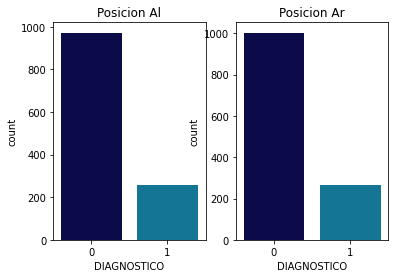

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(Data_Al["DIAGNOSTICO"], palette='ocean').set(title='Posicion Al')
plt.subplot(1, 2, 2)
sns.countplot(Data_Ar["DIAGNOSTICO"], palette='ocean').set(title='Posicion Ar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Pr')]

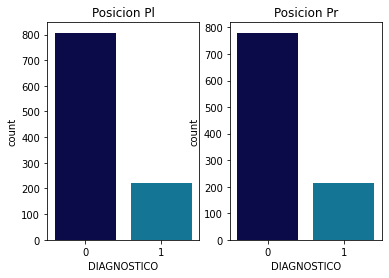

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(Data_Pl["DIAGNOSTICO"], palette='ocean').set(title='Posicion Pl')
plt.subplot(1, 2, 2)
sns.countplot(Data_Pr["DIAGNOSTICO"], palette='ocean').set(title='Posicion Pr')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Lr')]

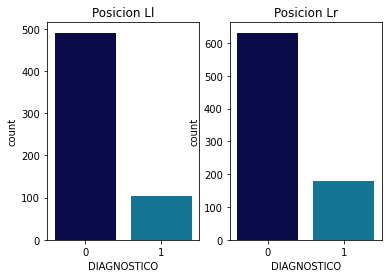

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(Data_Ll["DIAGNOSTICO"], palette='ocean').set(title='Posicion Ll')
plt.subplot(1, 2, 2)
sns.countplot(Data_Lr["DIAGNOSTICO"], palette='ocean').set(title='Posicion Lr')

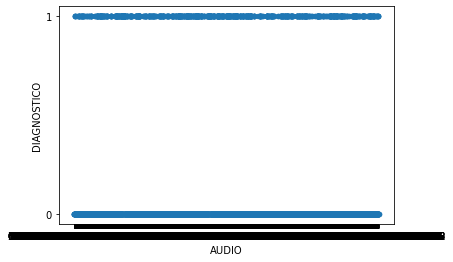

In [ ]:
DFCOPY.plot.scatter(x ="AUDIO", y ="DIAGNOSTICO")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Sexo Masculino')]

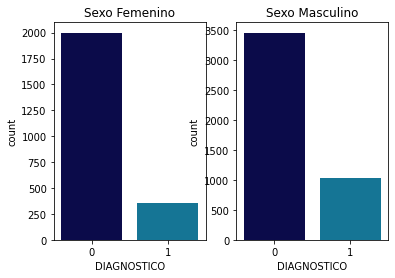

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(Data_F["DIAGNOSTICO"], palette='ocean').set(title='Sexo Femenino')
plt.subplot(1, 2, 2)
sns.countplot(Data_M["DIAGNOSTICO"], palette='ocean').set(title='Sexo Masculino')